<a href="https://colab.research.google.com/github/ramadhanbay/kuliah/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import section**

In [66]:
import pandas as pd
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Data Preprocessing section**



In [49]:
df=pd.read_csv('/content/drive/MyDrive/Kuliah/Visulalisasi Analitik/spotify.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [50]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df['years_since_release'] = datetime.now().year - df['track_album_release_date'].dt.year
df['year_release'] = df['track_album_release_date'].dt.year

In [51]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years_since_release,year_release
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,4,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,4,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,4,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,4,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,4,2019


In [52]:
df.drop(['track_name', 'track_artist','track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_subgenre', 'danceability','energy',  'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ], axis=1, inplace=True)

In [53]:
df.isna().sum()

track_id               0
track_popularity       0
playlist_genre         0
duration_ms            0
years_since_release    0
year_release           0
dtype: int64

In [54]:
df.nunique()

track_id               28356
track_popularity         101
playlist_genre             6
duration_ms            19785
years_since_release       63
year_release              63
dtype: int64

In [63]:
df['track_id'].duplicated().sum()

2029

In [59]:
df.drop_duplicates(inplace=True)

In [ ]:
le = LabelEncoder()

df['track_id'] = le.fit_transform(df['track_id'])

In [60]:
df.shape

(30385, 6)

In [61]:
fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>paiwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

<ipython-input-61-0c692ba0040e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



change categori variable to numeric

In [62]:
df.head()

,track_id,track_popularity,playlist_genre,duration_ms,years_since_release,year_release
0,6f807x0ima9a1j3VPbc7VN,66,pop,194754,4,2019
1,0r7CVbZTWZgbTCYdfa2P31,67,pop,162600,4,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,70,pop,176616,4,2019
3,75FpbthrwQmzHlBJLuGdC7,60,pop,169093,4,2019
4,1e8PAfcKUYoKkxPhrHqw4x,69,pop,189052,4,2019


Text(0.5, 0, 'Attributes')

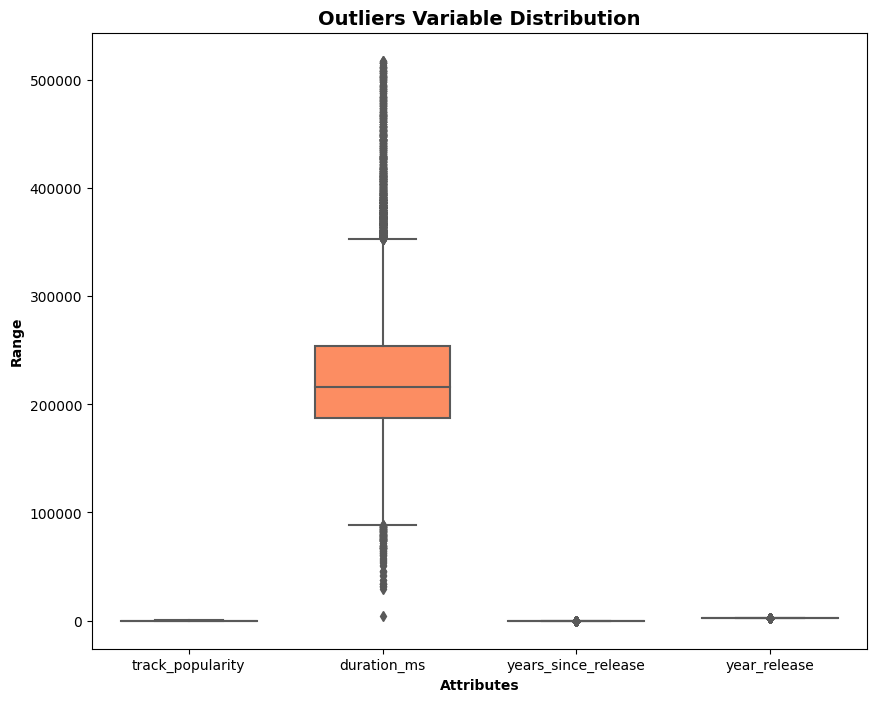

In [65]:
attributes = ['track_popularity','playlist_genre','duration_ms', 'years_since_release', 'year_release']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for track_popularity
Q1 = df.track_popularity.quantile(0.05)
Q3 = df.track_popularity.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.track_popularity >= Q1 - 1.5*IQR) & (df.track_popularity <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for playlist_genre
Q1 = df.playlist_genre.quantile(0.05)
Q3 = df.playlist_genre.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.playlist_genre >= Q1 - 1.5*IQR) & (df.playlist_genre <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for duration_ms
Q1 = df.duration_ms.quantile(0.05)
Q3 = df.duration_ms.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.duration_ms >= Q1 - 1.5*IQR) & (df.duration_ms <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for years_since_release
Q1 = df.years_since_release.quantile(0.05)
Q3 = df.years_since_release.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.years_since_release >= Q1 - 1.5*IQR) & (df.years_since_release <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for year_release
Q1 = df.year_release.quantile(0.05)
Q3 = df.year_release.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.year_release >= Q1 - 1.5*IQR) & (df.year_release <= Q3 + 1.5*IQR)]

In [67]:
# Rescaling Atribute
rfm_df = df[['track_popularity','playlist_genre','duration_ms', 'years_since_release', 'year_release']]
# Instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

ValueError: ignored